# Where do most software developers live and how happy are they about their jobs?
### According to Stack Overflow Annual Developer Survey

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#questions">Questions</a></li>
    <li><a href="#dw">Data wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#cz">Conclusions</a></li>
</ul></li>

<a id='intro'></a>
## Introduction

In this notebook I will be analysing data from Stack Overflow’s annual Developer Survey, the largest survey of people who code around the world. I am focused on five years of reviews, from 2016 to 2020. In particular, I am interested in finding which are the top three countries for software developers and see how happy they are about their jobs.

<a id='questions'></a>
## Questions

**Q1:** Where do most software developers live? Here, I am interested in finding the top three countries from the Stack Overflow Annual Developer Survey and find a trend throughout the years of interest (2016-2020).

**Q2:** How happy are software developers from the top three countries over the years? Therefore I want to know if there is a trend or if there are differences between the groups related to happiness.

**Q3**: Also, I want to stress the importance of the data cleaning process in the final output of an analysis. So, how important is it for our findings to have a clean dataset? I will look at the top three countries before data cleaning (in 1_data_gathering.ipynb) and check if we have different results in the cleaned dataset.

<a id='dw'></a>
## Data wrangling
1. <a href="#gather">**Gather**</a>: load in the data: download the last five years of Stack Overflow Survey data, 2015-2016 from [here](https://insights.stackoverflow.com/survey)
2. **Asses**: Check for cleanliness - these steps are done in the first notebook, 1_data_gathering.ipynb: 
    * Check the headers for each year;
    * Identify columns of interest for each year: country, job satisfaction
    * Check missing values in our data
3. <a href="#clean">**Clean**</a>: Trim and clean your dataset for analysis.
    * Identify how job satisfaction is defined over the years and find a common scale 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

from IPython import display
%matplotlib inline

<a id='gather'></a>
### Load the data 

In [2]:
PATH_IN = "data_out"

df_2016 = pd.read_csv(os.path.join(PATH_IN, 'data_2016_raw.csv'))
df_2017 = pd.read_csv(os.path.join(PATH_IN, 'data_2017_raw.csv'))
df_2018 = pd.read_csv(os.path.join(PATH_IN, 'data_2018_raw.csv'))
df_2019 = pd.read_csv(os.path.join(PATH_IN, 'data_2019_raw.csv'))
df_2020 = pd.read_csv(os.path.join(PATH_IN, 'data_2020_raw.csv'))

<a id='clean'></a>
### Clean the data

### Map Job Satisfaction for 2016-2020

### #1 2016

In [3]:
def plot_year_job_satisfaction(df, year):
    '''
    INPUT
        df - a dataframe containing percentages of number of respondents for job satofsaction values
        year - year of the survey
    OUTPUT
        A bar chart for job satisfaction distribution of the dataframe 
    '''
    (df['job_satisfaction'].value_counts()/df['job_satisfaction'].shape[0]*100).plot(kind='bar', figsize=(8, 4));
    plt.title(f'Job Satisfaction Distribution {year} (%)');
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Number of respondents (%)')
    plt.show();

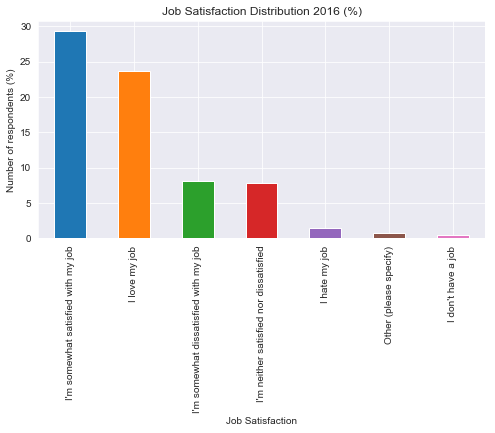

In [4]:
# change dtype
# plot 2016
plot_year_job_satisfaction(df_2016, 2016)

In [6]:
def clean_remap_job_satisfaction(df, map_dict):
    '''
    INPUT
        df - an uncleaned dataframe with different values for job satisfaction
        map_dict - dictionary to map job satifsactior
    OUTPUT
        df - a dataframe with cleaned and remaped job satisfaction values
    '''
    print(f"Missing values for: job satisfaction - {df['job_satisfaction'].isnull().sum()}, country - {df['country'].isnull().sum()}")
    df.dropna(subset=['country', 'job_satisfaction'], inplace=True)
    if df['job_satisfaction'].dtype == float:
        df['job_satisfaction'] = df['job_satisfaction'].astype(int).astype(str)
    print(map_dict)
    df['job_satisfaction'] = df['job_satisfaction'].map(map_dict)
    df = df[['year', 'country', 'job_satisfaction']]
    print(df.info())
    return df

In [7]:
job_satisfaction_2016 = {'I love my job': 5,
                        "I'm somewhat satisfied with my job":4, 
                        "I'm neither satisfied nor dissatisfied":3, "I don't have a job":3,
                        "I'm somewhat dissatisfied with my job":2, 
                        "I hate my job":1} 

df_2016 = df_2016.copy()
df_2016 = clean_remap_job_satisfaction(df_2016, job_satisfaction_2016)
df_2016.head()

Missing values for: job satisfaction - 15920, country - 502
{'I love my job': 5, "I'm somewhat satisfied with my job": 4, "I'm neither satisfied nor dissatisfied": 3, "I don't have a job": 3, "I'm somewhat dissatisfied with my job": 2, 'I hate my job': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39958 entries, 1 to 56009
Data columns (total 3 columns):
year                39958 non-null int64
country             39958 non-null object
job_satisfaction    39545 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


,year,country,job_satisfaction
1,2016,Afghanistan,5.0
3,2016,Afghanistan,5.0
6,2016,Afghanistan,3.0
7,2016,Afghanistan,5.0
9,2016,Albania,4.0


In [8]:
df_2016.dropna(subset=['job_satisfaction'], inplace=True)

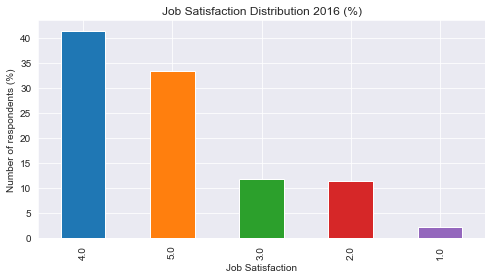

In [10]:
# change dtype
# plot 2016
plot_year_job_satisfaction(df_2016, 2016)

### #2 2017

In [11]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
country              51392 non-null object
coding_experience    51145 non-null object
job_satisfaction     40376 non-null float64
programming_lg       36625 non-null object
salary               12891 non-null float64
year                 51392 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


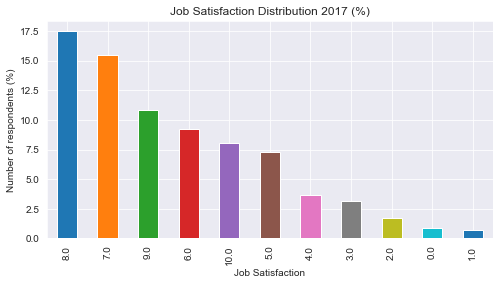

In [12]:
# change dtype
# plot the distribution
plot_year_job_satisfaction(df_2017, 2017)

In [13]:
job_satisfaction_2017 = {'10': 5, '9': 5, '8': 5,
                        '6':4, '7':4, 
                        '5':3,
                        '3':2, '4':2,
                        '0':1, '1':1, '2':1} 

df_2017 = df_2017.copy()
df_2017 = clean_remap_job_satisfaction(df_2017, job_satisfaction_2017)
df_2017.head()

Missing values for: job satisfaction - 11016, country - 0
{'10': 5, '9': 5, '8': 5, '6': 4, '7': 4, '5': 3, '3': 2, '4': 2, '0': 1, '1': 1, '2': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40376 entries, 2 to 51391
Data columns (total 3 columns):
year                40376 non-null int64
country             40376 non-null object
job_satisfaction    40376 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ MB
None


,year,country,job_satisfaction
2,2017,United Kingdom,5
3,2017,United States,2
4,2017,Switzerland,5
6,2017,United States,4
7,2017,Poland,4


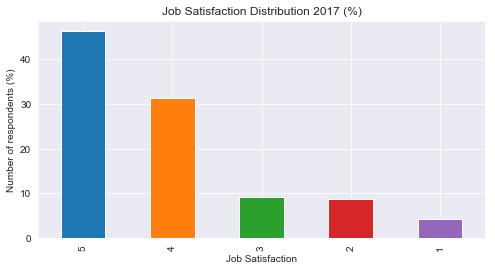

In [14]:
# change dtype
# plot the distribution
plot_year_job_satisfaction(df_2017, 2017)

### #3 2018

In [15]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 6 columns):
country              98443 non-null object
coding_experience    93835 non-null object
job_satisfaction     69276 non-null object
salary               50578 non-null object
programming_lg       78334 non-null object
year                 98855 non-null int64
dtypes: int64(1), object(5)
memory usage: 2.6+ MB


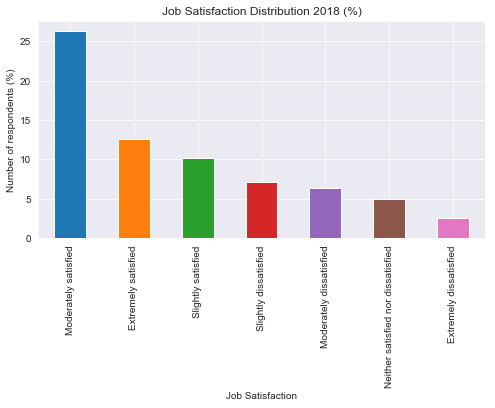

In [16]:
# change dtype
# plot the distribution
plot_year_job_satisfaction(df_2018, 2018)

In [17]:
job_satisfaction_2018 = {"Extremely satisfied": 5,
                        "Moderately satisfied":4, "Slightly satisfied":4, 
                        "Neither satisfied nor dissatisfied":3,
                        "Slightly dissatisfied":2, "Moderately dissatisfied":2,
                        "Extremely dissatisfied":1} 

df_2018 = df_2018.copy()
df_2018 = clean_remap_job_satisfaction(df_2018, job_satisfaction_2018)
df_2018.head()

Missing values for: job satisfaction - 29579, country - 412
{'Extremely satisfied': 5, 'Moderately satisfied': 4, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3, 'Slightly dissatisfied': 2, 'Moderately dissatisfied': 2, 'Extremely dissatisfied': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69276 entries, 0 to 80449
Data columns (total 3 columns):
year                69276 non-null int64
country             69276 non-null object
job_satisfaction    69276 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.8+ MB
None


,year,country,job_satisfaction
0,2018,Kenya,5
1,2018,United Kingdom,2
2,2018,United States,4
3,2018,United States,3
4,2018,South Africa,4


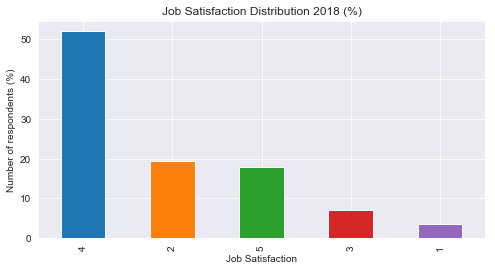

In [18]:
# plot the distribution
plot_year_job_satisfaction(df_2018, 2018)

### #4 2019

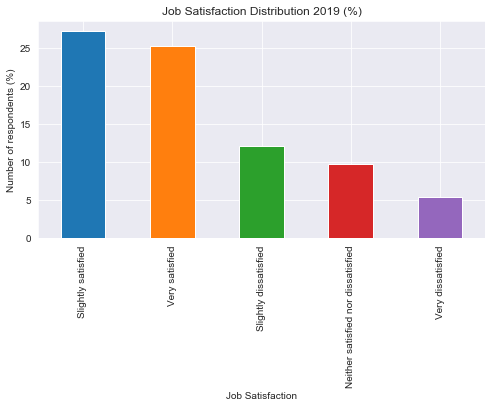

In [19]:
# plot the distribution
plot_year_job_satisfaction(df_2019, 2019)

In [20]:
job_satisfaction_2019 = {"Very satisfied":5, 
                        "Slightly satisfied":4,
                        "Neither satisfied nor dissatisfied":3, 
                        "Slightly dissatisfied":2,
                        "Very dissatisfied":1} 

df_2019 = df_2019.copy()
df_2019 = clean_remap_job_satisfaction(df_2019, job_satisfaction_2019)
df_2019.head()

Missing values for: job satisfaction - 17895, country - 132
{'Very satisfied': 5, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3, 'Slightly dissatisfied': 2, 'Very dissatisfied': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70988 entries, 2 to 88330
Data columns (total 3 columns):
year                70988 non-null int64
country             70988 non-null object
job_satisfaction    70988 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None


,year,country,job_satisfaction
2,2019,Thailand,4
3,2019,United States,4
4,2019,Ukraine,2
5,2019,Canada,4
6,2019,Ukraine,3


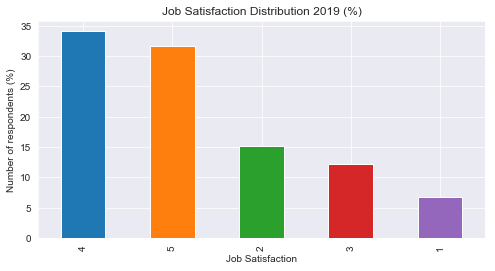

In [21]:
# plot the new distribution
plot_year_job_satisfaction(df_2019, 2019)

### #5 2020

In [22]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
salary               34756 non-null float64
country              64072 non-null object
job_satisfaction     45194 non-null object
programming_lg       57378 non-null object
coding_experience    57684 non-null object
year                 64461 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ MB


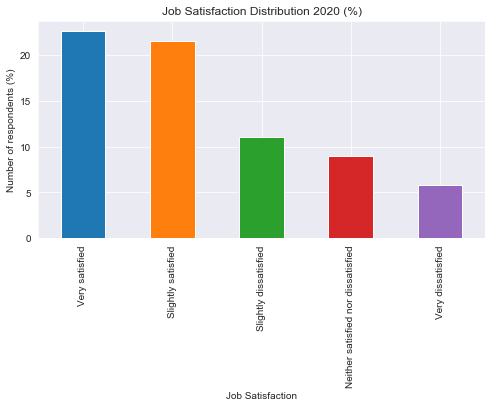

In [23]:
# plot the distribution
plot_year_job_satisfaction(df_2020, 2020)

In [24]:
df_2020 = df_2020.copy()
df_2020 = clean_remap_job_satisfaction(df_2020, job_satisfaction_2019)
df_2020.head()

Missing values for: job satisfaction - 19267, country - 389
{'Very satisfied': 5, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3, 'Slightly dissatisfied': 2, 'Very dissatisfied': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 64154
Data columns (total 3 columns):
year                45194 non-null int64
country             45194 non-null object
job_satisfaction    45194 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ MB
None


,year,country,job_satisfaction
0,2020,Germany,4
1,2020,United Kingdom,1
3,2020,Albania,2
5,2020,Germany,4
6,2020,India,5


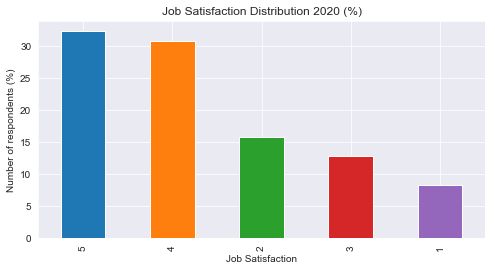

In [25]:
# plot the new distribution
plot_year_job_satisfaction(df_2020, 2020)

<a id='eda'></a>
### Exploratory Data Analysis

#### Unify clean data for 2016-2020 for job satisfaction and country

In [26]:
# combine our dataframes into a single one
df_all = pd.concat([df_2020, df_2019, df_2018, df_2017, df_2016], ignore_index=True, sort=True)[['year', 'country', 'job_satisfaction']]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265379 entries, 0 to 265378
Data columns (total 3 columns):
year                265379 non-null int64
country             265379 non-null object
job_satisfaction    265379 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


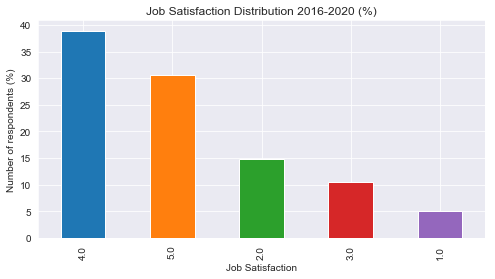

In [47]:
# change dtype
# plot 2016-2020
plot_year_job_satisfaction(df_all, '2016-2020')

In [51]:
(df_all['job_satisfaction'].value_counts()/df_all['job_satisfaction'].shape[0]*100)

4.0    38.892301
5.0    30.676127
2.0    14.784893
3.0    10.506860
1.0    5.139819 
Name: job_satisfaction, dtype: float64

In [28]:
df_all.country.nunique()

241

In [29]:
df_all['year'] = pd.to_datetime(df_all["year"].astype(str), format="%Y")

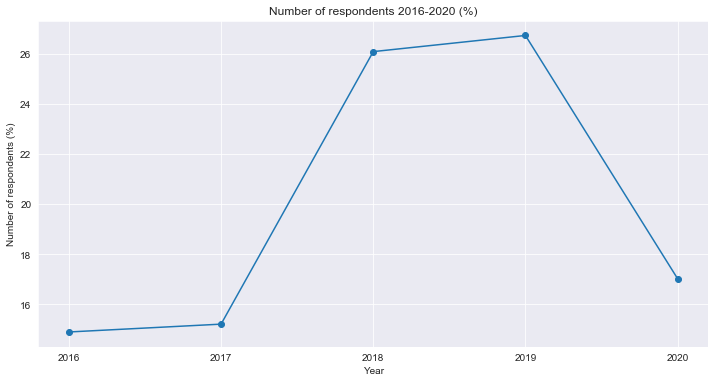

In [30]:
(df_all['year'].value_counts()/df_all.shape[0]*100).sort_index().plot(style='o-', figsize=(12,6))
plt.title(f'Number of respondents 2016-2020 (%)');
plt.xlabel('Year')
plt.ylabel('Number of respondents (%)')
plt.show();

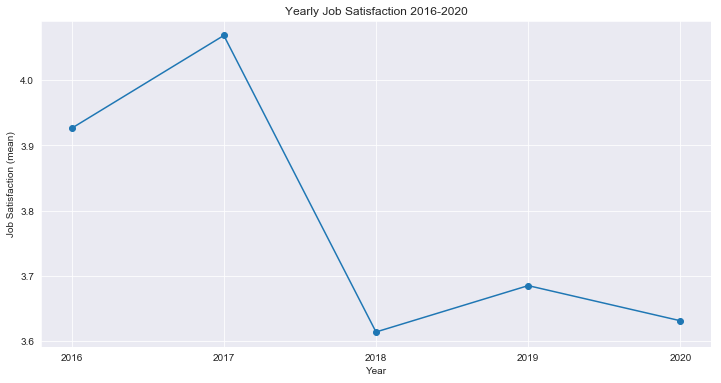

In [31]:
df_all.groupby(by=['year'])['job_satisfaction'].mean().sort_index().plot(style='o-', figsize=(12,6));
plt.title(f'Yearly Job Satisfaction 2016-2020');
plt.xlabel('Year')
plt.ylabel('Job Satisfaction (mean)')
plt.show();

### Q1: Where do most software developers live?
### Top three countries

In [32]:
s = df_all['country'].groupby(df_all['year']).value_counts()

In [33]:
country_counts = s.groupby(level=[0]).nlargest(3).reset_index(level=[0]).rename(columns={'country':'counts'}).reset_index(level=[1]).reset_index(level=[0], 
                                                                                                                                drop=True)
# unique countries
country_counts.country.unique()

array(['United States', 'United Kingdom', 'India'], dtype=object)

In [34]:
country_counts.head()

,country,year,counts
0,United States,2016-01-01,10337
1,United Kingdom,2016-01-01,3490
2,India,2016-01-01,2825
3,United States,2017-01-01,9322
4,India,2017-01-01,3790


In [53]:
country_counts['counts'].sum()/265379

0.4126475719631169

In [35]:
us_counts = country_counts[country_counts['country'] == 'United States']['counts']
india_counts = country_counts[country_counts['country'] == 'India']['counts']
uk_counts = country_counts[country_counts['country'] == 'United Kingdom']['counts']

ind = np.arange(len(us_counts))  # the x locations for the groups
width = 0.2

labels = [2016, 2017, 2018, 2019, 2020]
locations = ind + width

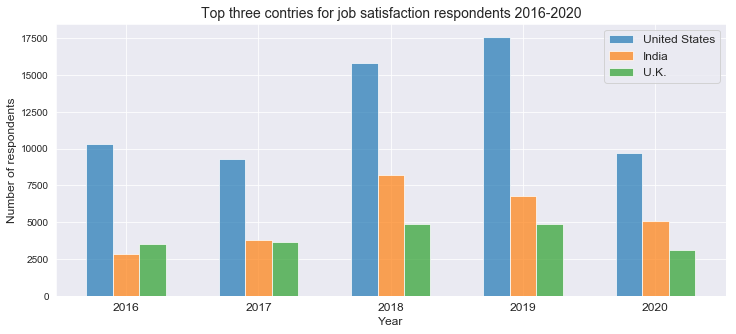

In [36]:
f, ax = plt.subplots(figsize=(12,5))

us_bars = plt.bar(ind, us_counts, width, alpha=.7, label='United States')
india_bars = plt.bar(ind + width, india_counts, width, alpha=.7, label='India')
uk_bars = plt.bar(ind + width*2, uk_counts, width, alpha=.7, label='U.K.')

# title and label
plt.title('Top three contries for job satisfaction respondents 2016-2020', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of respondents', fontsize = 12)
plt.xticks(locations, labels, fontsize = 12)
ax.legend(fontsize = 12)
plt.show();

In [37]:
# unique countries
top_3_countries = list(country_counts.country.unique())
top_3_countries

['United States', 'United Kingdom', 'India']

We can see that from 2016 to 2020, the United States, United Kingdom and India are the top three countries where most software developers live, according to the Stack Overflow Annual Developer Survey.

### Q2: How happy are software developers from the top three countries over the years? 

In [38]:
df_all_top3 = df_all[df_all['country'].isin(top_3_countries)].reset_index(drop=True)

In [39]:
df_all_top3_meanjs = df_all_top3.groupby(by=['year', 'country'], 
                    as_index=False)['job_satisfaction'].mean().rename(columns={'job_satisfaction':'mean_job_satisfaction'})
df_all_top3_meanjs.head()

,year,country,mean_job_satisfaction
0,2016-01-01,India,3.899469
1,2016-01-01,United Kingdom,3.913754
2,2016-01-01,United States,3.974364
3,2017-01-01,India,3.652507
4,2017-01-01,United Kingdom,4.131802


In [40]:
us_meanjs = df_all_top3_meanjs[df_all_top3_meanjs['country'] == 'United States']['mean_job_satisfaction']
india_meanjs = df_all_top3_meanjs[df_all_top3_meanjs['country'] == 'India']['mean_job_satisfaction']
uk_meanjs = df_all_top3_meanjs[df_all_top3_meanjs['country'] == 'United Kingdom']['mean_job_satisfaction']

In [41]:
ind, labels

(array([0, 1, 2, 3, 4]), [2016, 2017, 2018, 2019, 2020])

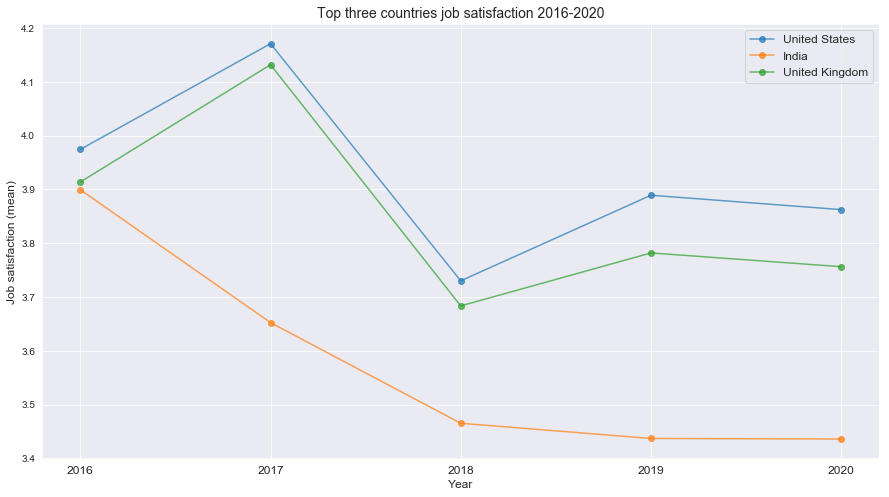

In [42]:
f, ax = plt.subplots(figsize=(15,8))

plt.plot(labels, us_meanjs, alpha=.7, label='United States', marker='o')
plt.plot(labels, india_meanjs, alpha=.7, label='India', marker='o')
plt.plot(labels, uk_meanjs, alpha=.7, label='United Kingdom', marker='o')

plt.xticks(labels, fontsize = 12)
plt.title('Top three countries job satisfaction 2016-2020', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Job satisfaction (mean)', fontsize = 12)
plt.legend(loc='best', fontsize = 12)
plt.show();

#### From the above line plot, we can identify two different groups related to job satisfaction:

1. Software developers in the United States and United Kingdom look very similar according to their job satisfaction. We can see that they have an overall higher satisfaction than software developers from India. They are slightly satisfied towards moderately satisfied, with a mean job satisfaction between 3.7 and almost 4.2. Also, we can see a little decrease in satisfaction from 2017 but it is still in the upper side overall satisfaction.
2. Meanwhile, for software developers from India, we can point a downwards trend of job satisfaction from 2016 to 2020. If in 2016 and 2017 were slightly satisfied about their jobs, from 2018 we can see that job satisfaction goes more closely to a neutral point of view but still on the positive side. 


### Q3: How important is it for our findings to have a clean dataset?
![](img\top3_uncleaned.PNG)

From the above bar chart of the top three countries for software developers from the uncleaned dataset we can identify the United States, India, United Kingdom and Germany as top three countries for software developers. We can see that these findings can cause bias in our output because in the cleaned dataset we have a different result. Therefore, I want to stress the importance of the data cleaning process in the data science analysis steps in order to be able to find meaningful and true insights about our data

<a id='cz'></a>
## Conclusions

1. The US, UK and India are the top three countries software developers live in 2016 to 2020, according to Stack Overflow Annual Developer Survey, the largest survey of people who code around the world.
2. Related to how happy they are as software developers, we found two groups. One from the US and UK, very similar, they are slightly happy about their jobs. The second group, from India, we identified a clear downwards trend of job satisfaction from 2016 to 2020. But, they are still on the positive side of job satisfaction.
3. We found different results on the cleaned dataset versus the raw, uncleaned one. Therefore, it is important for us to really understand our data and follow best practice in the data science process in order to make sense of it and find meaningful and true insights that can rise to data driven decisions